# Recurrent Neural Network

In [1]:
!pip install numpy==1.18.5 --user

## Part 1 - Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [8]:
X_train = []
y_train = []
for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [14]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [19]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [20]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

### Fitting the RNN to the Training set

In [22]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0411
Epoch 2/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0038
Epoch 13/100
38/38 [=====

38/38 [==============================] - 3s 66ms/step - loss: 0.0015
Epoch 99/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0016
Epoch 100/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0015


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [23]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [39]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [40]:
predicted_stock_price

array([[785.6041 ],
       [783.0606 ],
       [782.7025 ],
       [783.65466],
       [786.5424 ],
       [791.9641 ],
       [797.6629 ],
       [801.02295],
       [802.36633],
       [802.5794 ],
       [802.29956],
       [801.74817],
       [801.16223],
       [801.172  ],
       [801.7363 ],
       [805.4366 ],
       [811.74005],
       [819.2133 ],
       [824.4212 ],
       [822.68713]], dtype=float32)

### Visualising the results

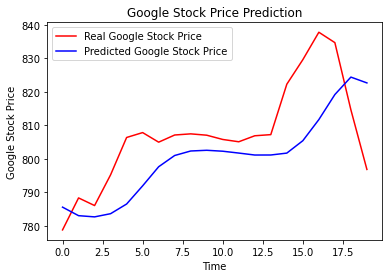

In [41]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()